In [37]:
# ===============================
# STEP 1: IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

# NLP
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Database
import sqlite3
from collections import Counter

# NLTK setup
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to C:\Users\Teesa
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Teesa
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Teesa
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
# ===============================
# STEP 2: LOAD DATASET
# ===============================
file_path = r"C:\Users\Teesa Sharma\Desktop\Text,web analytics\data\irctc_reviews.csv"
df = pd.read_csv(file_path, encoding='utf-8')

# Rename main text column
df.rename(columns={'content': 'review'}, inplace=True)

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset Loaded Successfully!
Shape: (1000, 4)


,reviewId,userName,review,score
0,96dbea39-d9fc-4edb-b61c-cc28673e9baa,Praveen dhanush,really good,5
1,a994b52e-2bef-4e71-a6c3-03faaebe4252,Krishna Vamsi M,unable to login from last month. have to clear...,4
2,b59be6ed-c5f3-4185-99f5-f126a8889004,Vivekananda N,My ticket has been confirmed for the past 10hr...,1
3,fe6d315a-51de-411a-8dd9-f6fd860c1b1a,MANGAPATHI RAO A V,I was trying to book tickets in Visakhapatnam ...,3
4,cac2ecbe-50e4-4a8a-a365-01e3220af34d,Satveer Kalupura,jab jaroorat ho bas tab hi nhi chalta baki sab...,1


In [39]:
# ===============================
# STEP 3: TEXT CLEANING
# ===============================
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['review'].apply(clean_text)
df[['review', 'clean_text']].head()


,review,clean_text
0,really good,really good
1,unable to login from last month. have to clear...,unable login last month clear user data cache ...
2,My ticket has been confirmed for the past 10hr...,ticket confirmed past hr ticket showing waitin...
3,I was trying to book tickets in Visakhapatnam ...,trying book ticket visakhapatnam vande bharat ...
4,jab jaroorat ho bas tab hi nhi chalta baki sab...,jab jaroorat ho ba tab hi nhi chalta baki sab ...


In [40]:
# ===============================
# STEP 4: BASIC TEXT STATS
# ===============================
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['clean_text'].apply(lambda x: len(x))
print("Average word count:", round(df['word_count'].mean(), 2))
df[['word_count', 'char_count']].describe()


Average word count: 8.66


,word_count,char_count
count,1000.000000,1000.000000
mean,8.658000,54.048000
std,11.632211,74.258966
min,0.000000,0.000000
25%,1.000000,7.000000
50%,3.000000,20.000000
75%,11.000000,69.000000
max,93.000000,459.000000


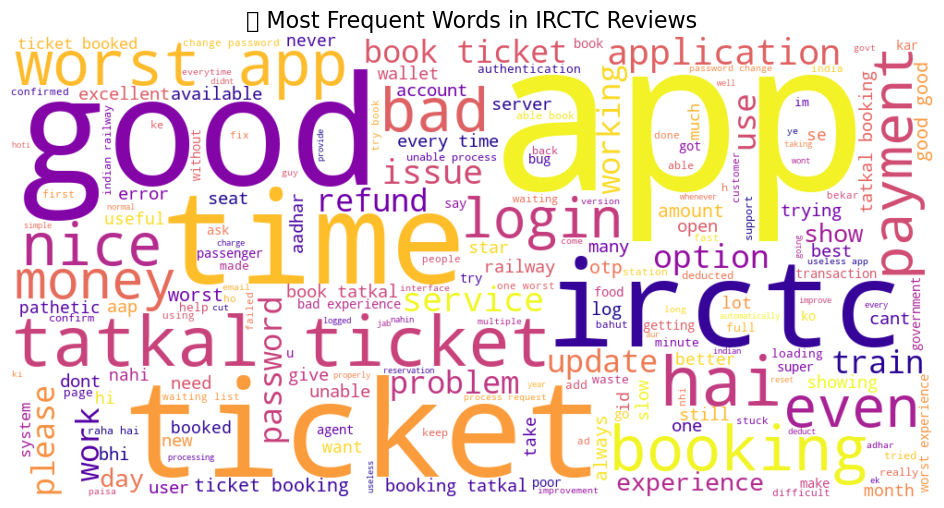

✅ Word cloud saved as: C:\Users\Teesa Sharma\Desktop\Text,web analytics\visuals\wordcloud_irctc.png


In [63]:
# ===============================
# STEP 5: WORD CLOUD (2D)
# ===============================
all_words = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='plasma').generate(all_words)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("🌟 Most Frequent Words in IRCTC Reviews", fontsize=16)

# Save figure
wordcloud_path = os.path.join(save_dir, "wordcloud_irctc.png")
plt.savefig(wordcloud_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Word cloud saved as: {wordcloud_path}")



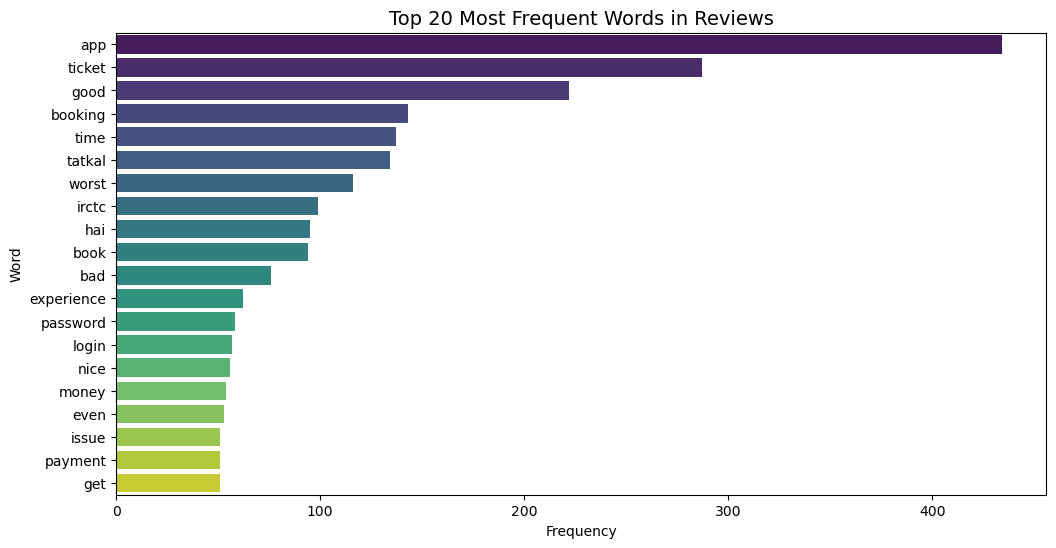

✅ 2D Word Frequency Bar Chart saved as: C:\Users\Teesa Sharma\Desktop\Text,web analytics\visuals\bar2d_word_frequency.png


In [64]:
# ===============================
# STEP 6: 2D FREQUENCY CHART
# ===============================
from collections import Counter
word_freq = Counter(" ".join(df['clean_text']).split())
most_common = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Word', data=most_common, palette='viridis')
plt.title("Top 20 Most Frequent Words in Reviews", fontsize=14)

# Save chart
bar2d_path = os.path.join(save_dir, "bar2d_word_frequency.png")
plt.savefig(bar2d_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ 2D Word Frequency Bar Chart saved as: {bar2d_path}")



In [65]:
# ===============================
# STEP 7A: 3D SCATTER (Plotly)
# ===============================
x = np.arange(len(most_common))
dz = most_common['Frequency']

fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=x, y=dz, z=np.zeros(len(most_common)),
    mode='markers+lines',
    marker=dict(size=10, color=dz, colorscale='Plasma', showscale=True),
    text=most_common['Word'],
    hovertemplate="<b>Word:</b> %{text}<br>Freq: %{y}<extra></extra>"
))
fig.update_layout(
    title="🚀 3D Word Frequency Visualization (IRCTC Reviews)",
    scene=dict(xaxis_title='Word Index', yaxis_title='Frequency', zaxis_title='Axis'),
    template='plotly_dark'
)
fig.show()

# Save interactive HTML
plotly3d_path = os.path.join(save_dir, "3D_word_frequency.html")
fig.write_html(plotly3d_path)
print(f"✅ 3D Plot saved as interactive HTML: {plotly3d_path}")



✅ 3D Plot saved as interactive HTML: C:\Users\Teesa Sharma\Desktop\Text,web analytics\visuals\3D_word_frequency.html


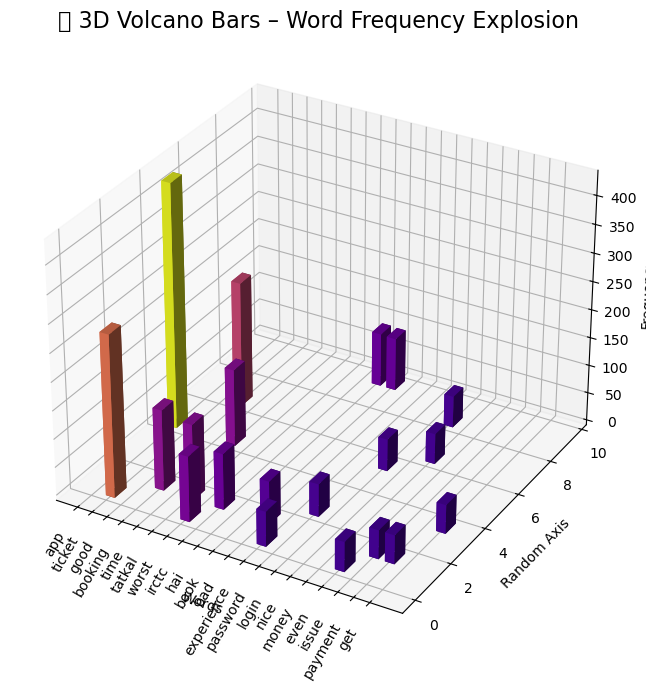

✅ 3D Volcano Bar Chart saved as: C:\Users\Teesa Sharma\Desktop\Text,web analytics\visuals\3D_volcano_bar.png


In [66]:
# ===============================
# STEP 7B: 3D VOLCANO BARS (Matplotlib)
# ===============================
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(most_common))
y = np.random.randint(0, 10, len(most_common))
z = np.zeros(len(most_common))
dx = dy = 0.6
dz = most_common['Frequency']

ax.bar3d(x, y, z, dx, dy, dz, color=plt.cm.plasma(dz / max(dz)))
ax.set_xticks(x)
ax.set_xticklabels(most_common['Word'], rotation=60, ha='right')
ax.set_title("🔥 3D Volcano Bars – Word Frequency Explosion", fontsize=16)
ax.set_xlabel("Words")
ax.set_ylabel("Random Axis")
ax.set_zlabel("Frequency")

volcano_path = os.path.join(save_dir, "3D_volcano_bar.png")
plt.savefig(volcano_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ 3D Volcano Bar Chart saved as: {volcano_path}")



In [67]:
# ===============================
# STEP 7C: 3D SPIRAL WORD TOWER (Plotly)
# ===============================
theta = np.linspace(0, 4*np.pi, len(most_common))
z = np.linspace(0, max(most_common['Frequency']), len(most_common))
r = z / max(z)
x = r * np.sin(theta)
y = r * np.cos(theta)

fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+lines',
    marker=dict(size=10, color=z, colorscale='Electric', showscale=True, opacity=0.9),
    text=most_common['Word'],
    hovertemplate="<b>Word:</b> %{text}<br>Height: %{z}<extra></extra>"
)])
fig.update_layout(
    title="🌀 3D Spiral Word Tower (IRCTC Reviews)",
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Word Frequency'),
    template='plotly_dark'
)
fig.show()

spiral_path = os.path.join(save_dir, "3D_spiral_tower.html")
fig.write_html(spiral_path)
print(f"✅ 3D Spiral Tower saved as: {spiral_path}")



✅ 3D Spiral Tower saved as: C:\Users\Teesa Sharma\Desktop\Text,web analytics\visuals\3D_spiral_tower.html


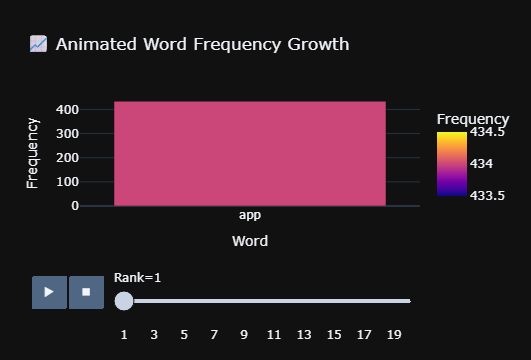

✅ Animated Word Growth Chart saved as: C:\Users\Teesa Sharma\Desktop\Text,web analytics\visuals\animated_word_growth.html


In [68]:
# ===============================
# STEP 7D: ANIMATED BAR CHART (Plotly Express)
# ===============================
most_common['Rank'] = np.arange(1, len(most_common)+1)

fig = px.bar(
    most_common,
    x='Word', y='Frequency',
    animation_frame='Rank',
    color='Frequency',
    range_y=[0, most_common['Frequency'].max()+5],
    title="📈 Animated Word Frequency Growth",
    color_continuous_scale='Plasma'
)
fig.update_layout(template='plotly_dark', xaxis_title='Word', yaxis_title='Frequency')

fig.show()

animated_bar_path = os.path.join(save_dir, "animated_word_growth.html")
fig.write_html(animated_bar_path)
print(f"✅ Animated Word Growth Chart saved as: {animated_bar_path}")



In [69]:
# ===============================
# STEP 7E: ROTATING 3D BUBBLE CLOUD
# ===============================
theta = np.linspace(0, 2*np.pi, len(most_common))
r = most_common['Frequency'] / max(most_common['Frequency']) * 10

fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=r * np.cos(theta),
    y=r * np.sin(theta),
    z=np.random.rand(len(most_common))*5,
    mode='markers+text',
    text=most_common['Word'],
    textposition="top center",
    marker=dict(size=most_common['Frequency'] / 2,
                color=most_common['Frequency'],
                colorscale='Viridis',
                opacity=0.9)
))
frames = []
for angle in np.linspace(0, 360, 60):
    frames.append(go.Frame(layout=dict(scene_camera=dict(
        eye=dict(x=np.cos(np.radians(angle))*2,
                 y=np.sin(np.radians(angle))*2,
                 z=1)))))

fig.frames = frames
fig.update_layout(
    updatemenus=[dict(type='buttons', showactive=False,
                      buttons=[dict(label='▶ Play', method='animate', args=[None, {"frame": {"duration": 100}}]),
                               dict(label='⏸ Pause', method='animate', args=[[None], {"frame": {"duration": 0}}])])],
    title='🌌 Rotating 3D Bubble Cloud of Words',
    template='plotly_dark'
)
fig.show()

bubble_path = os.path.join(save_dir, "rotating_3D_bubble_cloud.html")
fig.write_html(bubble_path)
print(f"✅ Rotating 3D Bubble Cloud saved as: {bubble_path}")


✅ Rotating 3D Bubble Cloud saved as: C:\Users\Teesa Sharma\Desktop\Text,web analytics\visuals\rotating_3D_bubble_cloud.html


In [51]:
# ===============================
# STEP 8: SAVE OUTPUTS
# ===============================
cleaned_csv_path = r"C:\Users\Teesa Sharma\Desktop\Text,web analytics\data\irctc_reviews_cleaned.csv"
db_path = r"C:\Users\Teesa Sharma\Desktop\Text,web analytics\data\irctc_reviews.db"

# Save CSV
df.to_csv(cleaned_csv_path, index=False)
print(f"✅ Cleaned CSV saved at: {cleaned_csv_path}")

# Save to DB
conn = sqlite3.connect(db_path)
df.to_sql('reviews', conn, if_exists='replace', index=False)
conn.close()
print(f"✅ Data successfully stored in DB at: {db_path}")


✅ Cleaned CSV saved at: C:\Users\Teesa Sharma\Desktop\Text,web analytics\data\irctc_reviews_cleaned.csv
✅ Data successfully stored in DB at: C:\Users\Teesa Sharma\Desktop\Text,web analytics\data\irctc_reviews.db


In [52]:
# ===============================
# STEP 9: VERIFY DB
# ===============================
conn = sqlite3.connect(db_path)
sample = pd.read_sql("SELECT review, clean_text, word_count FROM reviews LIMIT 5", conn)
conn.close()
sample

,review,clean_text,word_count
0,really good,really good,2
1,unable to login from last month. have to clear...,unable login last month clear user data cache ...,17
2,My ticket has been confirmed for the past 10hr...,ticket confirmed past hr ticket showing waitin...,12
3,I was trying to book tickets in Visakhapatnam ...,trying book ticket visakhapatnam vande bharat ...,48
4,jab jaroorat ho bas tab hi nhi chalta baki sab...,jab jaroorat ho ba tab hi nhi chalta baki sab ...,12
